In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
import mglearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_circles(noise=.24, factor=.5, random_state=1)
y_named = np.array(['blue', 'red'])[y]
y_named[:3]

array(['red', 'red', 'blue'], dtype='<U4')

In [3]:
X_train, X_test, y_ntrain, y_ntest, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

In [4]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_ntrain)

In [5]:
print('X_test shape: ', X_test.shape)
print('decision function output shape: ', gbc.decision_function(X_test).shape)

X_test shape:  (25, 2)
decision function output shape:  (25,)


In [6]:
print('decision function output: ', gbc.decision_function(X_test)[:6])

decision function output:  [ 4.29870147 -2.9459108  -4.42422003 -3.75275711  4.26842451  3.66779101]


In [7]:
print('thresholded decision function:\n',
     gbc.decision_function(X_test) > 0)
print('predictions:\n',
     gbc.predict(X_test))

thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [8]:
gbc.classes_

array(['blue', 'red'], dtype='<U4')

In [9]:
greater_zero = (gbc.decision_function(X_test) > 0).astype(int)

In [10]:
np.all(gbc.classes_[greater_zero] == gbc.predict(X_test))

True

In [11]:
gbc.decision_function(X_test).min(axis=0), gbc.decision_function(X_test).max(axis=0)

(-8.274627492328479, 4.298701467985345)

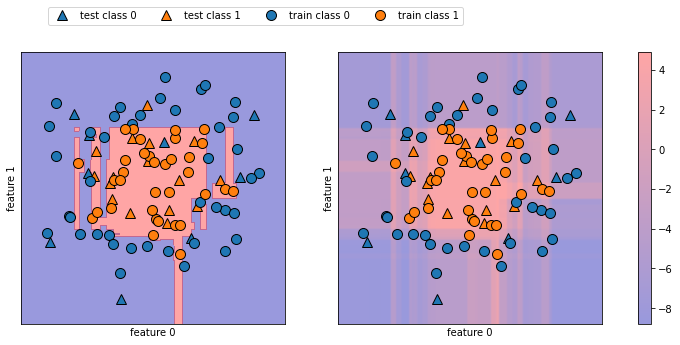

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbc, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbc, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['test class 0', 'test class 1',
               'train class 0', 'train class 1'], ncol=4, loc=(.1, 1.1))

In [16]:
print('shape of probability: ', gbc.predict_proba(X_test).shape)

shape of probability:  (25, 2)


In [20]:
print('probability estimates:\n', gbc.predict_proba(X_test))

probability estimates:
 [[1.34040793e-02 9.86595921e-01]
 [9.50069865e-01 4.99301347e-02]
 [9.88158351e-01 1.18416494e-02]
 [9.77084444e-01 2.29155558e-02]
 [1.38104298e-02 9.86189570e-01]
 [2.48971162e-02 9.75102884e-01]
 [9.99745162e-01 2.54838037e-04]
 [1.38104298e-02 9.86189570e-01]
 [1.55122384e-01 8.44877616e-01]
 [2.65854190e-02 9.73414581e-01]
 [9.98197361e-01 1.80263909e-03]
 [1.38104298e-02 9.86189570e-01]
 [1.65194291e-02 9.83480571e-01]
 [7.06089209e-01 2.93910791e-01]
 [2.48971162e-02 9.75102884e-01]
 [9.85191941e-01 1.48080593e-02]
 [8.14158160e-01 1.85841840e-01]
 [9.87638272e-01 1.23617283e-02]
 [1.47583100e-02 9.85241690e-01]
 [1.38104298e-02 9.86189570e-01]
 [1.38104298e-02 9.86189570e-01]
 [2.10123369e-01 7.89876631e-01]
 [6.30043365e-02 9.36995664e-01]
 [9.99415761e-01 5.84239130e-04]
 [5.30834051e-01 4.69165949e-01]]


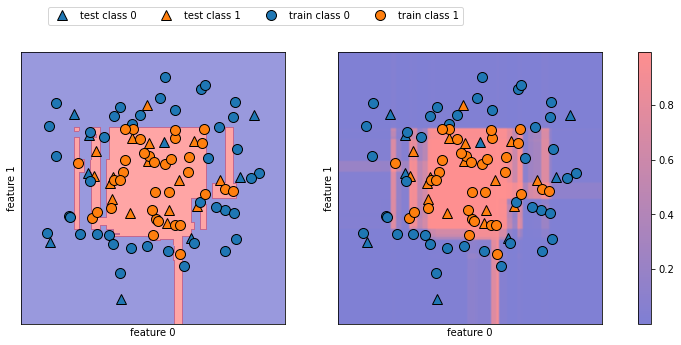

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbc, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbc, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['test class 0', 'test class 1',
               'train class 0', 'train class 1'], ncol=4, loc=(.1, 1.1))

In [39]:
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbc = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [40]:
print('decision function shape:\n', gbc.decision_function(X_test).shape)

decision function shape:
 (38, 3)


In [41]:
print('decision function:\n', gbc.decision_function(X_test)[:10])

decision function:
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99677434 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.995715    0.04758267 -1.92720695]]


In [42]:
print('Argmax of decision function:\n',
     np.argmax(gbc.decision_function(X_train), axis=1))
print('predicitons:\n', gbc.predict(X_train))

Argmax of decision function:
 [0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1
 1 2 1 0 1 2 0 0 1 1 0 2 0 0 2 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2
 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1
 2]
predicitons:
 [0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1
 1 2 1 0 1 2 0 0 1 1 0 2 0 0 2 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2
 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1
 2]


In [43]:
print('predict proba:\n', gbc.predict_proba(X_test)[:10])

predict proba:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]
 [0.10217718 0.78840034 0.10942248]
 [0.09763381 0.11012538 0.79224081]
 [0.10217718 0.78840034 0.10942248]
 [0.10217718 0.78840034 0.10942248]]


In [45]:
print('Argmax of predict proba:\n',
     np.argmax(gbc.predict_proba(X_test), axis=1))
print('predicitons:\n', gbc.predict(X_test))

Argmax of predict proba:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predicitons:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [33]:
from sklearn.linear_model import LogisticRegression

In [38]:
logreg = LogisticRegression(max_iter=300)

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print('class in iris: ', logreg.classes_)
print('predictions:\n', logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test)[:10], axis=1)
print('argmax of decision function:\n', argmax_dec_func)
print('argmax with classes:\n', logreg.classes_[argmax_dec_func][:10])

class in iris:  ['setosa' 'versicolor' 'virginica']
predictions:
 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function:
 [1 0 2 1 1 0 1 2 1 1]
argmax with classes:
 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
